# Find the shortest path

The below figure shows a square board

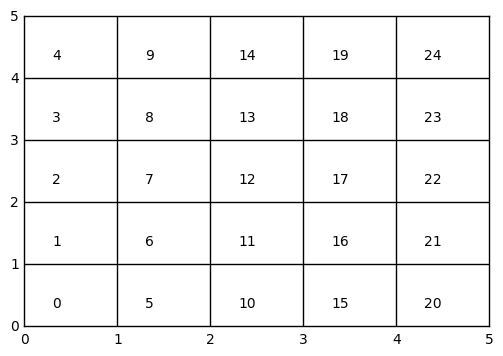

In [2]:
import matplotlib.pyplot as plt
import numpy as np

plt.hold(True)
for ln in range(1, 5):
    plt.plot((0, 5), (ln, ln), color=(0., 0., 0.))
    plt.plot((ln, ln), (0, 5), color=(0., 0., 0.))
for itm in range(0, 25):
    plt.text(np.floor(itm/5)+0.3, itm%5 + 0.3, str(itm))
plt.show()

Fields 24 is adjacent to the exit from the gameboard. Any horizontal step and any vertical step takes one time unit. Therefore to reach the exti from fields 24 takes one time unit. Any field adjacent to 24 takes an extra time unit.

## Python implementation

Each cell is represented as a class that holds a reference to each adjacent cell.

In [35]:
class Cell:
    def __init__(self):
        self.number = -1
        self.weight = 0
        self.neighbors = []

The gameboard is created by creating the cells and linking them.

In [13]:
gameboard = [Cell() for i in range(25)]
for i in range(25):
    gameboard[i].number = i
    if i % 5 != 4:
        gameboard[i].neighbors.append(gameboard[i+1])
    if i % 5 != 0:
        gameboard[i].neighbors.append(gameboard[i-1])
    if i >= 5:
        gameboard[i].neighbors.append(gameboard[i-5])
    if i < 20:
        gameboard[i].neighbors.append(gameboard[i+5])

The end point is cell 22.

In [16]:
end_points = [cell for cell in gameboard if cell.number == 22]

First all weights are zeroed.

In [15]:
for i in range(len(gameboard)):
    gameboard[i].weight = 0

Then start at the end point and increase the weight of each adjacent cell by one.

In [34]:
current_cells = end_points

step = 1
while len(current_cells):
    next_cells = []
    for cell in current_cells:
        cell.weight = step
        next_cells.extend([itm for itm in cell.neighbors
                           if itm.weight == 0])
    step += 1
    current_cells = next_cells


With those cells the gameboard can be redrawn showing the number of steps from each cell to the exit.

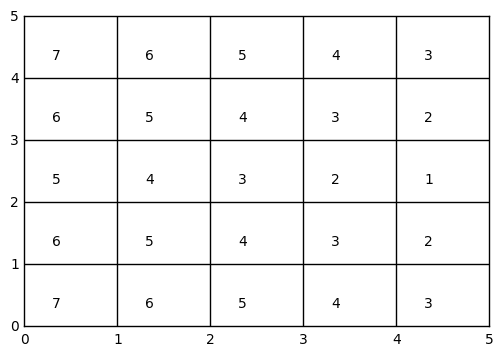

In [22]:
plt.hold(True)
for ln in range(1, 5):
    plt.plot((0, 5), (ln, ln), color=(0., 0., 0.))
    plt.plot((ln, ln), (0, 5), color=(0., 0., 0.))
for itm in range(0, 25):
    plt.text(np.floor(itm/5)+0.3, itm%5 + 0.3, str(gameboard[itm].weight))
plt.show()

## Non passable cells

If a cell cannot be passed it will not propagate. The cells can simply be removed from the gameboard, or marked as non passable and ignored by the propagation algorithm, the latter method is easier if cells are rather dynamically removed as the gameboard does not have to be relinked constantly.

In [58]:
class Cell:
    def __init__(self, number):
        self.number = number
        self.weight = 0
        self.neighbors = []
        self.passable = True

The new algorithm has to check if a cell is passable.

In [86]:
def calc_weights(end_points):
    current_cells = end_points

    step = 1
    while len(current_cells):
        next_cells = []
        for cell in current_cells:
            cell.weight = step
            next_cells.extend([itm for itm in cell.neighbors
                               if (itm.weight == 0 and itm.passable == True)])
        step += 1
        current_cells = next_cells

Create a new gameboard with non passable cells.

In [87]:
blocked_gameboard = [Cell(i) for i in range(25)]
for i in [5, 7, 8, 19, 17, 16]:
    blocked_gameboard[i].passable = False
for i in range(len(blocked_gameboard)):
    if i % 5 != 4:
        blocked_gameboard[i].neighbors.append(blocked_gameboard[i+1])
    if i % 5 != 0:
        blocked_gameboard[i].neighbors.append(blocked_gameboard[i-1])
    if i >= 5:
        blocked_gameboard[i].neighbors.append(blocked_gameboard[i-5])
    if i < 20:
        blocked_gameboard[i].neighbors.append(blocked_gameboard[i+5])

Caluclate the weights.

In [89]:
calc_weights([itm for itm in blocked_gameboard if itm.number==22])

And plot the new game board.

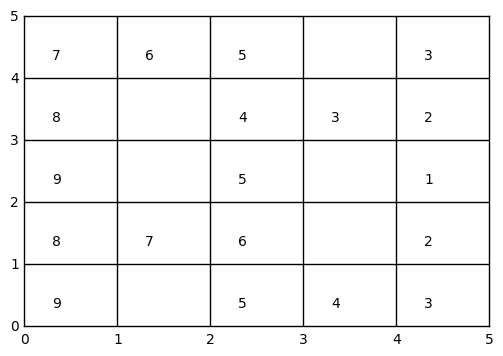

In [90]:
plt.hold(True)
for ln in range(1, 5):
    plt.plot((0, 5), (ln, ln), color=(0., 0., 0.))
    plt.plot((ln, ln), (0, 5), color=(0., 0., 0.))
for i in range(len(blocked_gameboard)):
    if blocked_gameboard[i].passable == False:
        continue
    itm = blocked_gameboard[i].number
    plt.text(np.floor(itm/5)+0.3, itm%5 + 0.3, str(blocked_gameboard[i].weight))
plt.show()

## Fields with additional penalty

Some fields may have an additional penalty. That penalty has to be added to the weight on top of the time units it takes to reach the exit.

In [112]:
class Cell:
    def __init__(self, number):
        self.number = number
        self.weight = 0
        self.neighbors = []
        self.passable = True
        self.extra_penalty = 0

In [124]:
def calc_weights(end_points):
    current_cells = end_points
    for cell in current_cells:
        cell.weight = 1 + cell.extra_penalty
        
    while len(current_cells):
        next_cells = set()
        for cell in current_cells:
            for next_cell in cell.neighbors:
                if next_cell.passable == False:
                    continue
                new_weight = cell.weight + next_cell.extra_penalty + 1
                if new_weight < next_cell.weight or next_cell.weight == 0 :
                    next_cell.weight = new_weight
                    next_cells.add(next_cell)

        current_cells = next_cells

In [139]:
weighted_gameboard = [Cell(i) for i in range(25)]
for i in [5, 7, 8, 19, 17, 16]:
    weighted_gameboard[i].passable = False
for i in range(len(weighted_gameboard)):
    if i % 5 != 4:
        weighted_gameboard[i].neighbors.append(weighted_gameboard[i+1])
    if i % 5 != 0:
        weighted_gameboard[i].neighbors.append(weighted_gameboard[i-1])
    if i >= 5:
        weighted_gameboard[i].neighbors.append(weighted_gameboard[i-5])
    if i < 20:
        weighted_gameboard[i].neighbors.append(weighted_gameboard[i+5])
weighted_gameboard[6].extra_penalty = 2

In [140]:
calc_weights([itm for itm in weighted_gameboard if itm.number==22 or itm.number==21])

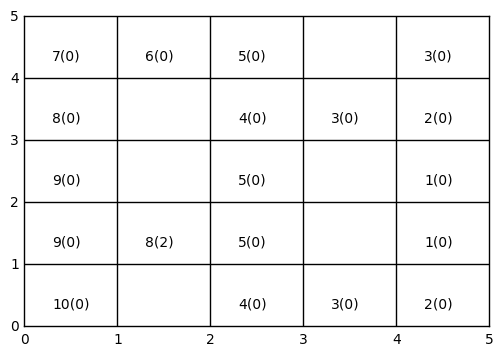

In [142]:
plt.hold(True)
for ln in range(1, 5):
    plt.plot((0, 5), (ln, ln), color=(0., 0., 0.))
    plt.plot((ln, ln), (0, 5), color=(0., 0., 0.))
for i in range(len(weighted_gameboard)):
    if weighted_gameboard[i].passable == False:
        continue
    itm = weighted_gameboard[i].number
    plt.text(np.floor(itm/5)+0.3, itm%5 + 0.3, "{0:d}({1:d})".format(
            weighted_gameboard[i].weight, weighted_gameboard[i].extra_penalty))
plt.show()